In this notebook, We will create a DL model to classify text between positive and negative using NLP. We will use the IMDB dataset for movie reviews which contains 50000 movie review (50% positive, 50% negative)

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from tensorflow import keras

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**Loading Dataset**

In [2]:
!wget "https://raw.githubusercontent.com/javaidnabi31/Word-Embeddding-Sentiment-Classification/master/movie_data.csv" -O "movie_data.csv" 

!ls -lah  

--2023-03-11 12:09:17--  https://raw.githubusercontent.com/javaidnabi31/Word-Embeddding-Sentiment-Classification/master/movie_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65862309 (63M) [text/plain]
Saving to: ‘movie_data.csv’

movie_data.csv      100%[===================>]  62.81M   159MB/s    in 0.4s    

2023-03-11 12:09:22 (159 MB/s) - ‘movie_data.csv’ saved [65862309/65862309]

total 63M
drwxr-xr-x 1 root root 4.0K Mar 11 12:09 .
drwxr-xr-x 1 root root 4.0K Mar 11 12:07 ..
drwxr-xr-x 4 root root 4.0K Mar  9 18:57 .config
-rw-r--r-- 1 root root  63M Mar 11 12:09 movie_data.csv
drwxr-xr-x 1 root root 4.0K Mar  9 18:58 sample_data


In [3]:
data = pd.read_csv('/content/movie_data.csv')

data.head()

,review,sentiment
0,I went and saw this movie last night after bei...,1
1,Actor turned director Bill Paxton follows up h...,1
2,As a recreational golfer with some knowledge o...,1
3,"I saw this film in a sneak preview, and it is ...",1
4,Bill Paxton has taken the true story of the 19...,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


<AxesSubplot:>

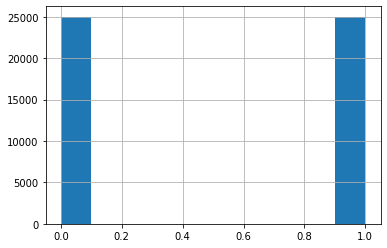

In [5]:
#Checking if the dataset is balanced
data['sentiment'].hist()

**Text Cleaning**

In [7]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

stop_words = set(stopwords.words('english')) - {'not'}
stemmer = PorterStemmer()

def clean_review(text):
  text = text.lower()
  text = re.sub(r'[^a-z]', ' ', text)
  tokens = word_tokenize(text)
  stemmed = [stemmer.stem(w) for w in tokens]
  text =' '.join(stemmed)
  text = ' '.join([w for w in text.split() if w not in stop_words])
  return text

text = "the movie is not good"
print(clean_review(text))

movi not good


In [8]:
data['clean_review'] = data['review'].apply(clean_review)
data.head()

,review,sentiment,clean_review
0,I went and saw this movie last night after bei...,1,went saw thi movi last night coax friend mine ...
1,Actor turned director Bill Paxton follows up h...,1,actor turn director bill paxton follow hi prom...
2,As a recreational golfer with some knowledge o...,1,recreat golfer knowledg sport histori wa pleas...
3,"I saw this film in a sneak preview, and it is ...",1,saw thi film sneak preview delight cinematogra...
4,Bill Paxton has taken the true story of the 19...,1,bill paxton ha taken true stori us golf open m...


**Splitting Data**

In [9]:
from sklearn.model_selection import train_test_split

x = data['clean_review'].values
y = data['sentiment'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 42)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


**Feature Extraction Using Bag of Words**

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(binary = True, max_features = 10000)
vectorizer.fit(x_train)

x_train_bow = vectorizer.transform(x_train)
x_test_bow = vectorizer.transform(x_test)

print(x_train_bow.shape, x_test_bow.shape)

(25000, 10000) (25000, 10000)


**Classification Using Logistic Regression**

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x_train_bow, y_train)

acc_train = model.score(x_train_bow, y_train)

print('Training Accuracy:', acc_train)

Training Accuracy: 0.98184


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Evaluating The Model**

In [14]:
acc_test = model.score(x_test_bow, y_test)
print("Testing Accuracy:", acc_test)

Testing Accuracy: 0.8662


**Predicting Sentiment Using The Model**

In [16]:
def predict(model, vectorizer, review):
  review = clean_review(review)
  review_bow = vectorizer.transform([review])
  return model.predict(review_bow)[0]

rvw = "The movie was not good"
print(predict(model, vectorizer, rvw))

rvw = "it was awesome"
print(predict(model, vectorizer, rvw))

0
1
